In [1]:
# Notebook to slim the production files for the LPR
import os
import sys
import tables as tb
import numpy  as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import dask.dataframe as dd
from matplotlib.cm import get_cmap

import re
cmap = get_cmap('Spectral')

In [2]:
# Function to calculate the Euclidean distance between two points
def distance(x1, y1, z1, x2, y2, z2):
    return np.sqrt((x2 - x1)**2 + (y2 - y1)**2 + (z2 - z1)**2)

init_z = 596.525024

In [4]:
# load in the info
# hits = pd.read_hdf("NEXT100_eminus_merged.h5", "hits")
# parts = pd.read_hdf("NEXT100_eminus_merged.h5", "parts")

directory = '../data/NEXT100_eminus/'


blob_tot_energy_dfs = []
parts_degrad_dfs = []
hits_degrad_dfs = []

# Loop over files in the directory
for filename in os.listdir(directory):
    if filename.endswith('.h5'):  # Adjust file extension as needed
        print("on file: ", filename)
        filepath = os.path.join(directory, filename)
        
        # Load file into DataFrame
        hits_degrad  = pd.read_hdf(filepath, "hits")
        parts_degrad = pd.read_hdf(filepath, "parts")

        hit_tot_energy = hits_degrad.groupby('event_id')['energy'].sum().reset_index(name='hit_tot_energy')
        parts_degrad = parts_degrad.loc[:, ["event_id", "final_x", "final_y", "final_z", "length"]]

        parts_degrad_dfs.append(parts_degrad)

        hits_degrad = pd.merge(hits_degrad, parts_degrad, on='event_id', how='left')

        # calculate the blob energy
        # Calculate Euclidean distance for each row
        hits_degrad["distance"] = distance(hits_degrad.x, hits_degrad.y, hits_degrad.z, hits_degrad.final_x, hits_degrad.final_y, hits_degrad.final_z)
        hits_inblob_degrad = hits_degrad[hits_degrad["distance"] <= 18].loc[:, ["event_id", "energy"]]
        
        hits_degrad_dfs.append(hits_degrad)
        blob_tot_energy_dfs.append(hits_inblob_degrad.groupby('event_id')['energy'].sum().reset_index(name='blob_tot_energy'))
        

blob_tot_energy_degrad  = pd.concat(blob_tot_energy_dfs, ignore_index=True)
parts_degrad            = pd.concat(parts_degrad_dfs, ignore_index=True)
hits_degrad             = pd.concat(hits_degrad_dfs, ignore_index=True)

display(blob_tot_energy_degrad)
display(parts_degrad)



on file:  NEXT100_eminus_slim_jobid_68.h5
on file:  NEXT100_eminus_slim_jobid_39.h5
on file:  NEXT100_eminus_slim_jobid_29.h5
on file:  NEXT100_eminus_slim_jobid_78.h5
on file:  NEXT100_eminus_slim_jobid_58.h5
on file:  NEXT100_eminus_slim_jobid_19.h5
on file:  NEXT100_eminus_slim_jobid_48.h5
on file:  NEXT100_eminus_slim_jobid_59.h5
on file:  NEXT100_eminus_slim_jobid_18.h5
on file:  NEXT100_eminus_slim_jobid_49.h5
on file:  NEXT100_eminus_slim_jobid_69.h5
on file:  NEXT100_eminus_slim_jobid_38.h5
on file:  NEXT100_eminus_slim_jobid_28.h5
on file:  NEXT100_eminus_slim_jobid_79.h5
on file:  NEXT100_eminus_slim_jobid_91.h5
on file:  NEXT100_eminus_slim_jobid_62.h5
on file:  NEXT100_eminus_slim_jobid_33.h5
on file:  NEXT100_eminus_slim_jobid_56.h5
on file:  NEXT100_eminus_slim_jobid_46.h5
on file:  NEXT100_eminus_slim_jobid_17.h5
on file:  NEXT100_eminus_slim_jobid_23.h5
on file:  NEXT100_eminus_slim_jobid_72.h5
on file:  NEXT100_eminus_slim_jobid_81.h5
on file:  NEXT100_eminus_slim_jobi

,event_id,blob_tot_energy
0,3400,0.569007
1,3401,0.708190
2,3402,0.723966
3,3403,0.849121
4,3404,0.480673
...,...,...
4990,4445,0.805976
4991,4446,0.596572
4992,4447,0.689103
4993,4448,0.566052


,event_id,final_x,final_y,final_z,length
0,3400,-54.495770,-11.625968,600.229736,71.099998
1,3401,-19.263903,-31.867132,577.837097,46.700001
2,3402,31.307911,-30.600683,590.026855,104.000000
3,3403,-27.051258,-26.642595,610.579529,51.000000
4,3404,2.952437,-29.931778,564.049316,48.700001
...,...,...,...,...,...
4995,4445,-33.435539,18.967247,604.710449,42.200001
4996,4446,-34.662895,-30.263702,612.053162,49.400002
4997,4447,-35.551952,-21.699373,592.185486,45.900002
4998,4448,-39.536629,-47.309742,575.706116,101.000000


In [7]:
def GetDFfromFile(filename):
    # Now load in the geant4 file
    # load in the info
    # hits = pd.read_hdf(filename, "hits")
    # hits = hits[hits.label == "ACTIVE"]
    # parts = pd.read_hdf(filename, "parts")
    # parts = parts[parts.primary == 1]

    config = pd.read_hdf(filename, "config")
    display(config)


    # parts = parts.loc[:, ["event_id", "final_x", "final_y", "final_z", "length"]]
    # hits = pd.merge(hits, parts, on='event_id', how='left')

    # # Calculate Euclidean distance for each row
    # hits["distance"] = distance(hits.x, hits.y, hits.z, hits.final_x, hits.final_y, hits.final_z)
    # hits_inblob = hits[hits["distance"] <= 18].loc[:, ["event_id", "energy"]]

    # blob_tot_energy = hits_inblob.groupby('event_id')['energy'].sum().reset_index(name='blob_tot_energy')

    return 0, 0


# GS model
parts_gs, blob_tot_energy_gs = GetDFfromFile("Next100_g4_5keminus_GS.h5")
parts_urban, blob_tot_energy_urban = GetDFfromFile("Next100_g4_5keminus_Urban.h5")
parts_wentzel, blob_tot_energy_wentzel = GetDFfromFile("Next100_g4_5keminus_Wentzel.h5")
parts_SS, blob_tot_energy_SS = GetDFfromFile("Next100_g4_5keminus_SS.h5")

,param_key,param_value
0,event_type,background
1,num_events,5000
2,saved_events,5000
3,interacting_events,5000
4,/PhysicsList/RegisterPhysics,G4EmStandardPhysics_option4
5,/PhysicsList/RegisterPhysics,G4DecayPhysics
6,/PhysicsList/RegisterPhysics,G4RadioactiveDecayPhysics
7,/PhysicsList/RegisterPhysics,NexusPhysics
8,/PhysicsList/RegisterPhysics,G4StepLimiterPhysics
9,/nexus/RegisterGeometry,Next100


,param_key,param_value
0,event_type,background
1,num_events,5000
2,saved_events,5000
3,interacting_events,5000
4,/PhysicsList/RegisterPhysics,G4EmStandardPhysics_option3
5,/PhysicsList/RegisterPhysics,G4DecayPhysics
6,/PhysicsList/RegisterPhysics,G4RadioactiveDecayPhysics
7,/PhysicsList/RegisterPhysics,NexusPhysics
8,/PhysicsList/RegisterPhysics,G4StepLimiterPhysics
9,/nexus/RegisterGeometry,Next100


,param_key,param_value
0,event_type,background
1,num_events,5000
2,saved_events,5000
3,interacting_events,5000
4,/PhysicsList/RegisterPhysics,G4EmStandardPhysicsWVI
5,/PhysicsList/RegisterPhysics,G4DecayPhysics
6,/PhysicsList/RegisterPhysics,G4RadioactiveDecayPhysics
7,/PhysicsList/RegisterPhysics,NexusPhysics
8,/PhysicsList/RegisterPhysics,G4StepLimiterPhysics
9,/nexus/RegisterGeometry,Next100


,param_key,param_value
0,event_type,background
1,num_events,5000
2,saved_events,5000
3,interacting_events,5000
4,/PhysicsList/RegisterPhysics,G4EmStandardPhysicsSS
5,/PhysicsList/RegisterPhysics,G4DecayPhysics
6,/PhysicsList/RegisterPhysics,G4RadioactiveDecayPhysics
7,/PhysicsList/RegisterPhysics,NexusPhysics
8,/PhysicsList/RegisterPhysics,G4StepLimiterPhysics
9,/nexus/RegisterGeometry,Next100


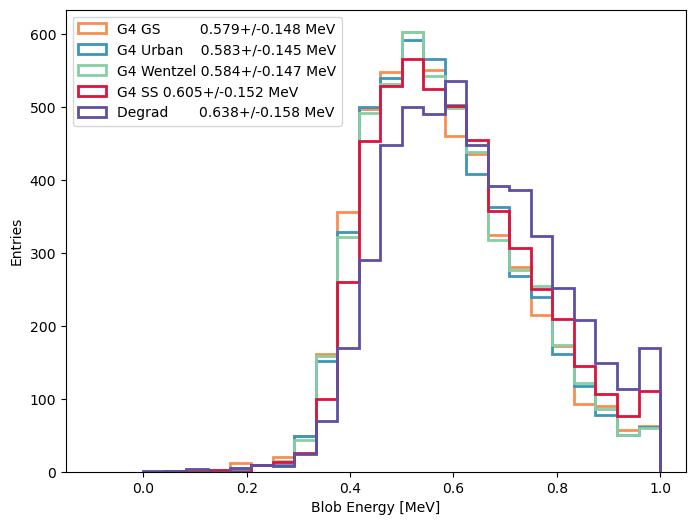

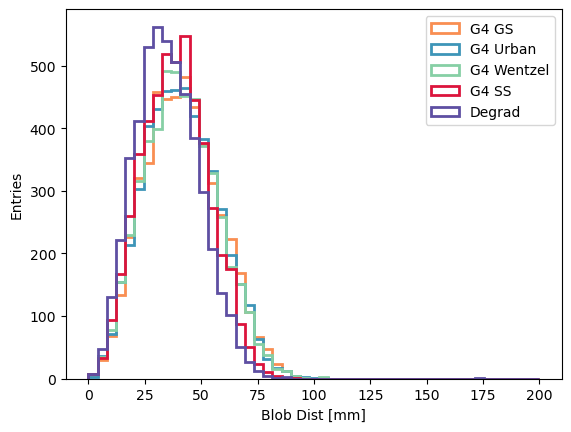

In [13]:

plt.figure(figsize=(8,6))
plt.hist(blob_tot_energy_gs.blob_tot_energy,     histtype="step",
    label = f"G4 GS         {np.mean(blob_tot_energy_gs.blob_tot_energy):.3f}+/-{np.std(blob_tot_energy_gs.blob_tot_energy):.3f} MeV",
    color = cmap(1/4),linewidth = 2,  bins = np.linspace(0,1,25));

plt.hist(blob_tot_energy_urban.blob_tot_energy,  histtype="step",
    label = f"G4 Urban    {np.mean(blob_tot_energy_urban.blob_tot_energy):.3f}+/-{np.std(blob_tot_energy_urban.blob_tot_energy):.3f} MeV",
    color = cmap(3.5/4),linewidth = 2, bins = np.linspace(0,1,25));

plt.hist(blob_tot_energy_wentzel.blob_tot_energy,histtype="step",
    label = f"G4 Wentzel {np.mean(blob_tot_energy_wentzel.blob_tot_energy):.3f}+/-{np.std(blob_tot_energy_wentzel.blob_tot_energy):.3f} MeV",
    color = cmap(3/4),linewidth = 2,  bins = np.linspace(0,1,25));

plt.hist(blob_tot_energy_SS.blob_tot_energy,histtype="step",
    label = f"G4 SS {np.mean(blob_tot_energy_SS.blob_tot_energy):.3f}+/-{np.std(blob_tot_energy_SS.blob_tot_energy):.3f} MeV",
    color = "crimson",linewidth = 2,  bins = np.linspace(0,1,25));

plt.hist(blob_tot_energy_degrad.blob_tot_energy, histtype="step",
    label = f"Degrad       {np.mean(blob_tot_energy_degrad.blob_tot_energy):.3f}+/-{np.std(blob_tot_energy_degrad.blob_tot_energy):.3f} MeV",
    color = cmap(4/4),linewidth = 2,   bins = np.linspace(0,1,25));

plt.xlabel("Blob Energy [MeV]")
plt.ylabel("Entries")
plt.legend(loc ="upper left")
plt.xlim(-0.15, 1.05)


plt.figure()
plt.hist(distance(0., 0., init_z, parts_gs.final_x, parts_gs.final_y, parts_gs.final_z),histtype="step",  label = "G4 GS", color = cmap(1/4), bins = np.linspace(0, 200, 50), linewidth = 2 );
plt.hist(distance(0., 0., init_z, parts_urban.final_x, parts_urban.final_y, parts_urban.final_z),histtype="step",  label = "G4 Urban", color = cmap(3.5/4), bins = np.linspace(0, 200, 50), linewidth = 2 );
plt.hist(distance(0., 0., init_z, parts_wentzel.final_x, parts_wentzel.final_y, parts_wentzel.final_z),histtype="step",  label = "G4 Wentzel", color = cmap(3/4), bins = np.linspace(0, 200, 50), linewidth = 2 );
plt.hist(distance(0., 0., init_z, parts_SS.final_x, parts_SS.final_y, parts_SS.final_z),histtype="step",  label = "G4 SS", color = "crimson", bins = np.linspace(0, 200, 50), linewidth = 2 );
plt.hist(distance(0., 0., init_z, parts_degrad.final_x, parts_degrad.final_y, parts_degrad.final_z), histtype="step",  label = "Degrad", color = cmap(4/4), bins = np.linspace(0, 200, 50), linewidth = 2);
plt.xlabel("Blob Dist [mm]")
plt.ylabel("Entries")
plt.legend()

In [ ]:
display(blob_tot_energy_degrad[blob_tot_energy_degrad.blob_tot_energy > 0.95])

In [ ]:
evt_id = 4448


evt = hits_degrad[hits_degrad.event_id == evt_id]
display(evt)

evt_part = parts_degrad[parts_degrad.event_id == evt_id]
display(evt_part)

pd.set_option('display.max_rows', 50) 

plt.figure()

plt.scatter(evt.x, evt.z, c = evt.time, s=.25)


# Center coordinates
x_center = evt_part['final_x'].iloc[0]
y_center = evt_part['final_z'].iloc[0]

print(x_center, y_center)

# Radius
radius = 2

# Generate points on the circle
theta = np.linspace(0, 2*np.pi, 100)
x_circle = x_center + radius * np.cos(theta)
y_circle = y_center + radius * np.sin(theta)

# Plot the circle
plt.plot(x_circle, y_circle)

plt.xlabel("x [mm]")
plt.ylabel("z [mm]")
plt.title("Degrad evt id 3412")
